# Predicting heart disease using Machine Learning 

This notebook looks into usingvarious Python-based ML adn DS libraries in an atempt to build a ML Model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take he following approach:
1. Problem defination
2. Data
3. Evaluation
4. Featuring
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement ,
> Givem clinical parameters about a patient, can we predict whether or not they have a heart Disease

## 2. Data
The data we are using in current project:
https://archive.ics.uci.edu/dataset/45/heart+disease

for extra data we can refer this website:
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease the proof of concept we'll pursue the project

## 4. Features
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
        
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

In [1]:
## Preparing the tools

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 
# Model from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2. Load Data

In [2]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

## 3.Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

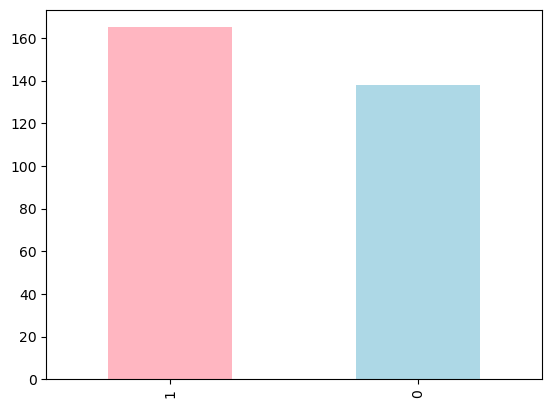

In [7]:
df["target"].value_counts().plot(kind="bar", color=["lightpink", "lightBlue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 4.Heart Disease frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target columns with sex column
# result:- in it you'll find out that nearly 62.9% chances that there is a heart disease patient
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


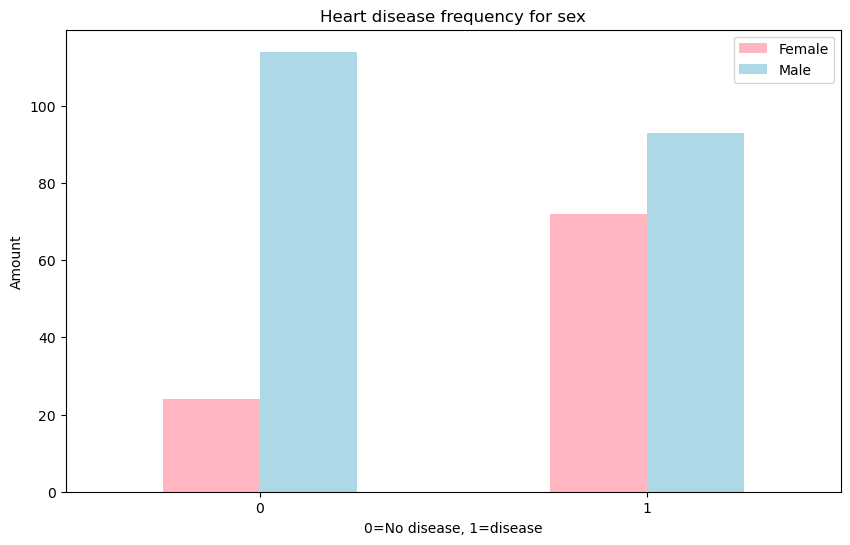

In [12]:
# create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lightpink", "lightBlue"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0=No disease, 1=disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

# Age vs max heart rate of heart diseae

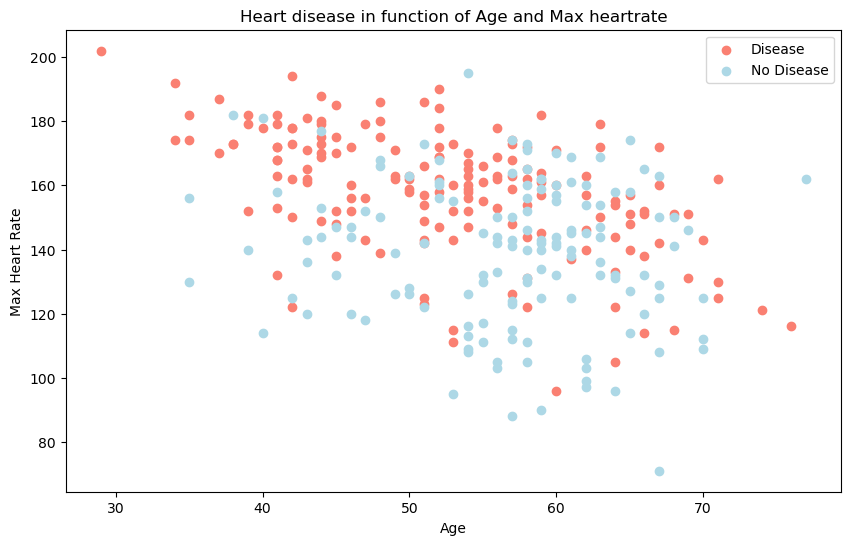

In [14]:
# Create another figure
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# Scatter with negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

plt.title("Heart disease in function of Age and Max heartrate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

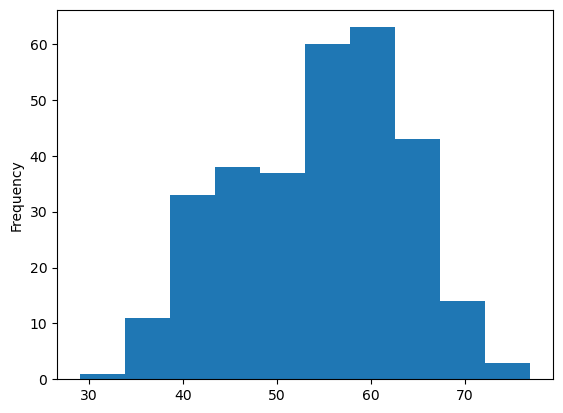

In [15]:
## Check the distribution of Age cploumn wuith histogram
df.age.plot.hist();
## Mostly peoples are in range f 50 to 70 who have some symptoms of heart disease and they are in data

## Heart Disease frequency per chest pain type
cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


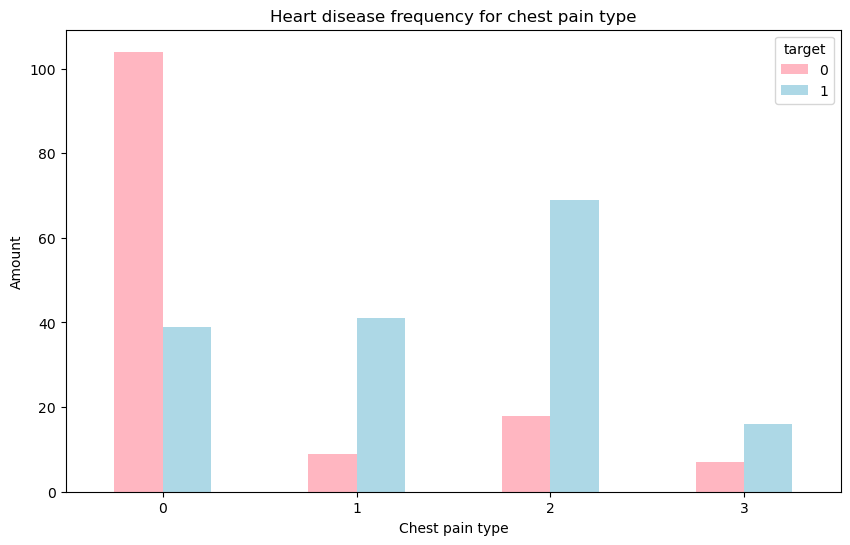

In [17]:
## Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lightpink", "lightBlue"])

plt.title("Heart disease frequency for chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.xticks(rotation=0);

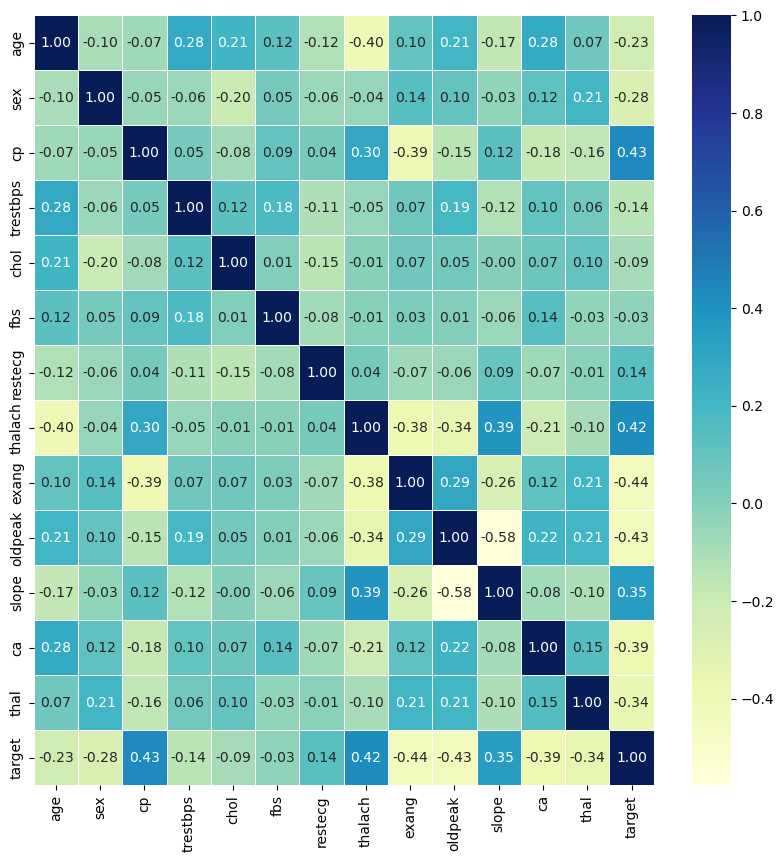

In [18]:
# Lets make our coorelation matrix
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix,
                annot =True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
## Split the data
X = df.drop("target", axis=1)

Y = df["target"]

In [21]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size = 0.2)

In [24]:
X_train, len(X_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 37    54    1   2       150   232    0        0      165      0      1.6   
 125   34    0   1       118   210    0        1      192      0      0.7   
 4     57    0   0       120   354    0        1      163      1      0.6   
 265   66    1   0       112   212    0        0      132      1      0.1   
 186   60    1   0       130   253    0        1      144      1      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 205   52    1   0       128   255    0        1      161      1      0.0   
 15    50    0   2       120   219    0        1      158      0      1.6   
 282   59    1   2       126   218    1        1      134      0      2.2   
 46    44    1   2       140   235    0        0      180      0      0.0   
 219   48    1   0       130   256    1        0      150      1      0.0   
 
      slope  ca  thal  
 37       2   0     3  
 125      2   0     2  
 4

In [25]:
Y_train, len(Y_train)

(37     1
 125    1
 4      1
 265    0
 186    0
       ..
 205    0
 15     1
 282    0
 46     1
 219    0
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, its time to build a Machine learning Model.

We'll train it(find the patterns) on the training set.

And we'll test it (use the patterns) on the test set

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [26]:
## Lets a make a dictionar of models
models = {"LR":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "RFC":RandomForestClassifier()}
    
# Create a function to fit and score models

def fit_and_score(model, X_train, X_test, Y_train, Y_test):
    
    #set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, Y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name]= model.score(X_test,Y_test)
    return model_scores

In [27]:
model_scores = fit_and_score(model=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores

C:\Users\Piyush Sunil Samarth\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'RFC': 0.9016393442622951}

## Model Comparison

In [28]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,LR,KNN,RFC
accuracy,0.868852,0.655738,0.901639


<Axes: >

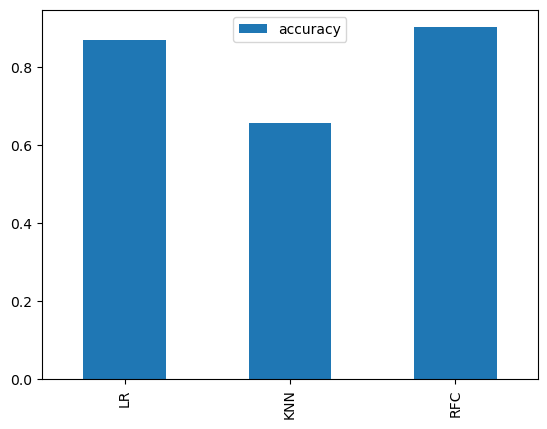

In [29]:
model_compare.T.plot.bar()

After the first predictions lets try to improve it

Let's look at the Following:
 
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the Curve(AUC)

# Hyperparameter Tuning

In [30]:
# Lets Tune KNN
train_scores  = []
test_scores = []

# Create a list of different values for n_neighbours

neighbors = range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the algo
    knn.fit(X_train, Y_train)
    
    train_scores.append(knn.score(X_train, Y_train))
    
    test_scores.append(knn.score(X_test,Y_test))
    

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.78099173553719,
 0.756198347107438,
 0.7603305785123967,
 0.7396694214876033,
 0.7231404958677686,
 0.7231404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.7231404958677686,
 0.71900826446281,
 0.7107438016528925,
 0.6983471074380165,
 0.7066115702479339,
 0.7107438016528925,
 0.7272727272727273,
 0.71900826446281,
 0.7231404958677686,
 0.71900826446281]

In [32]:
test_scores

[0.5737704918032787,
 0.5573770491803278,
 0.639344262295082,
 0.6885245901639344,
 0.6557377049180327,
 0.6065573770491803,
 0.6885245901639344,
 0.639344262295082,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.5737704918032787,
 0.6229508196721312,
 0.5901639344262295,
 0.639344262295082,
 0.5901639344262295,
 0.639344262295082]

Maximum KNN score on test data: 68.85%


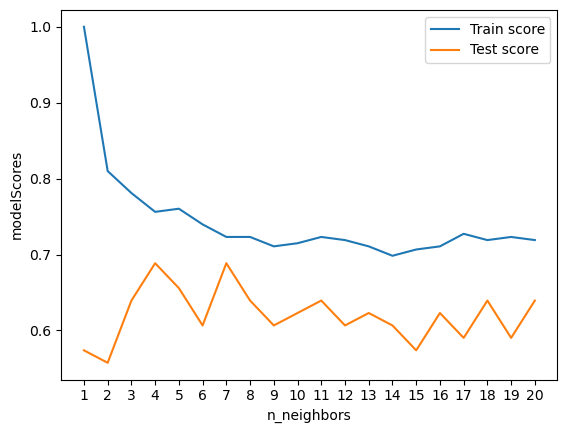

In [33]:
plt.plot(neighbors, train_scores, label ="Train score")
plt.plot(neighbors, test_scores, label ="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("n_neighbors")
plt.ylabel("modelScores")
plt.legend()

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedsearchCV

we are going to tune :
1. LogisticRegression()
2. RandomForestClassifier()

...using RandomizedSearchCV

In [34]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver":["liblinear"]}

rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [35]:
## to use more than once
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels
    on a classification
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)
                  }
    print(f"Accuracy: { accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}")
    print(f"f1_score: {f1:.2f}")
    
    return metric_dict

In [36]:
## Tune Logistic regression

np.random.seed(42)

# Setup random hyperparameter search  for Logistic Regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#fit random hyperparameter search model for LogisticRegression

rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [38]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

In [39]:
y_preds=rs_log_reg.predict(X_test)
evaluate_preds(Y_test,y_preds)

Accuracy: 88.52%
Precision: 0.91%
Recall: 0.88
f1_score: 0.89


{'accuracy': 0.89, 'precision': 0.91, 'recall': 0.88, 'f1': 0.89}

In [40]:
## Tune RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search  for RFC Regression

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#fit random hyperparameter search model for RFC

rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
rs_rf.score(X_test,Y_test)

0.8688524590163934

In [43]:
Y_preds=rs_rf.predict(X_test)
evaluate_preds(Y_test,Y_preds)

Accuracy: 86.89%
Precision: 0.86%
Recall: 0.91
f1_score: 0.88


{'accuracy': 0.87, 'precision': 0.86, 'recall': 0.91, 'f1': 0.88}

## Hyperparameter Tuning with GridsearchCV

In [44]:
## Different Hyperparameter grid For LR model

log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver":["liblinear"]}
# Setup grid hyperparameter searh for LR

gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=True)
# Fit Grid hyperparameter search model
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
gs_log_reg.best_params_

{'C': 78.47599703514607, 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

## Evaluating Our tuned ml classifier beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... also we will use cross-validation

In [47]:
Y_preds_gs = gs_log_reg.predict(X_test)
Y_preds_gs

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [48]:
Y_test

163    1
260    0
213    0
44     1
133    1
      ..
239    0
231    0
243    0
60     1
25     1
Name: target, Length: 61, dtype: int64

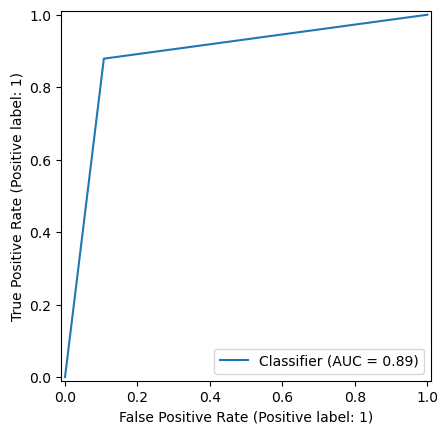

In [49]:
## Plot ROC curve and calculate AUC metric
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Y_preds_gs)

In [50]:
## calculate fpr,tpr, and threesholds
fpr, tpr, threesholds = roc_curve(Y_test, Y_preds_gs)
# check fpr
fpr

array([0.        , 0.10714286, 1.        ])

In [51]:
tpr

array([0.        , 0.87878788, 1.        ])

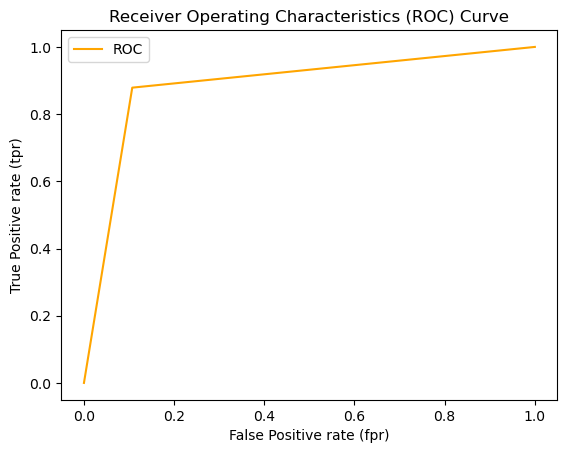

In [52]:
# Create a funcn to plot ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true POsitive rate (tpr) of a model.
    """
    # Plot ROC curve 
    plt.plot(fpr, tpr, color = "orange", label="ROC")
    #Plot line with no predictive power(baseline)
   # plt.plot([0,1], [0,1], color="darkblue", linestyle = "--", label = "Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [53]:
## Confusion matrix
print(confusion_matrix(Y_test,Y_preds_gs))

[[25  3]
 [ 4 29]]


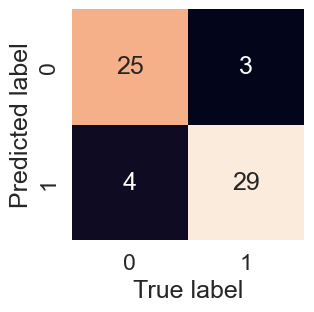

In [54]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(Y_test, Y_preds_gs)

Now we've got a ROC curve an AUC metric and a Confusion matrix, let's get a classification report
as well as Cross-validated precision, recall, f1-score.

In [55]:
print(classification_report(Y_test,Y_preds_gs))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation metrics using cross-validation

We're going to calculate precision,recall and f1-score of our model usin cross-validation and to do so we'll be using cross_val_score().

In [56]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 78.47599703514607, 'solver': 'liblinear'}

In [79]:
clf = LogisticRegression(C=4.281332398719396,
                        solver="liblinear")

In [58]:
cross_val_score(clf,X,Y, cv=10)

array([0.87096774, 0.77419355, 0.83870968, 0.9       , 0.9       ,
       0.8       , 0.86666667, 0.86666667, 0.7       , 0.73333333])

In [59]:
## Cross-validated accuracy
cv_acc = cross_val_score(clf,X,Y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.86666667, 0.71666667])

In [60]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8248633879781421

In [61]:
# Cross validated precision
cv_precision = cross_val_score(clf,X,Y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8188009641520078

In [62]:
# Cross validated recall
cv_rc = cross_val_score(clf,X,Y, cv=5, scoring="recall")
cv_recall = np.mean(cv_rc)
cv_recall

0.8787878787878787

In [63]:
# Cross validated f1-score
cv_f1 = cross_val_score(clf,X,Y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8464039460644465

<Axes: title={'center': 'cross-validated classification metrics'}>

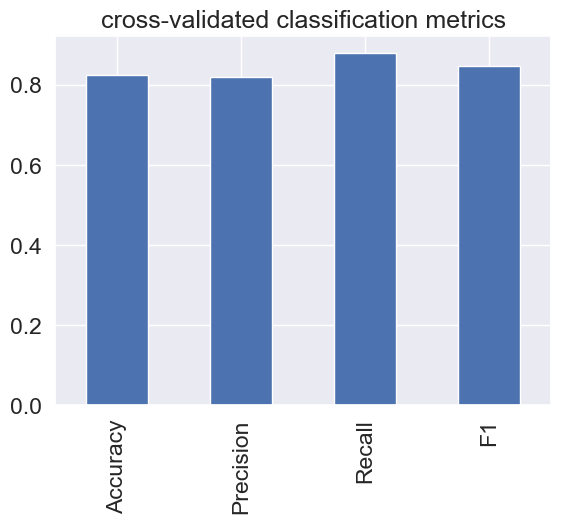

In [64]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="cross-validated classification metrics",
                     legend = False)

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contributed

Finding feature importance is different for each machine learning model.One way to find feature importance is o search for "(MODEL NAME) feature importance"

Let"s find the feature importance for our Logistic regression model.

In [65]:
clf = LogisticRegression(C=4.281332398719396,
                        solver="liblinear")
clf.fit(X_train, Y_train)

LogisticRegression(C=4.281332398719396, solver='liblinear')

In [66]:
clf.coef_

array([[-5.95969308e-03, -1.61149702e+00,  8.01952548e-01,
        -1.75187153e-02,  2.94427253e-04,  1.72904142e-01,
         5.20819321e-01,  2.45243611e-02, -8.82088141e-01,
        -5.26629092e-01,  6.47077206e-01, -8.40774905e-01,
        -6.77014823e-01]])

In [67]:
# match column with coef
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.005959693083174921,
 'sex': -1.6114970200149286,
 'cp': 0.8019525480763366,
 'trestbps': -0.01751871526637118,
 'chol': 0.00029442725251865826,
 'fbs': 0.17290414193154258,
 'restecg': 0.5208193214540516,
 'thalach': 0.02452436105594364,
 'exang': -0.8820881405188676,
 'oldpeak': -0.5266290915164142,
 'slope': 0.6470772059215878,
 'ca': -0.8407749051835042,
 'thal': -0.6770148228497628}

<Axes: title={'center': 'Feature Importance'}>

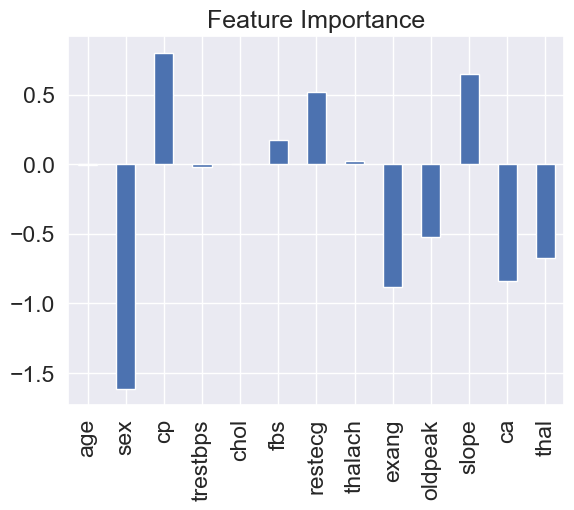

In [68]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [69]:
pd.crosstab(df["sex"], df["target"])
# in it ratio is decreases

target,0,1
sex,,
0,24,72
1,114,93


In [70]:
pd.crosstab(df["slope"], df["target"])
# as slope value increases thechances of heart disease increase

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [71]:
lrclf = LogisticRegression(C=4.281332398719396,
                        solver="liblinear")

In [72]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [73]:
df["target"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [74]:
df["age"].iloc[0]

63

In [75]:
age_df = pd.DataFrame(columns=['age','target'])

for index in df.index:
    if df.at[index, "target"] ==1:
        age_df = age_df.append({'age': df.at[index, "age"], 'target': df.at[index, 'target']},ignore_index=True)
age_df

C:\Users\Piyush Sunil Samarth\AppData\Local\Temp\ipykernel_24588\3915639932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_df = age_df.append({'age': df.at[index, "age"], 'target': df.at[index, 'target']},ignore_index=True)
C:\Users\Piyush Sunil Samarth\AppData\Local\Temp\ipykernel_24588\3915639932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_df = age_df.append({'age': df.at[index, "age"], 'target': df.at[index, 'target']},ignore_index=True)
C:\Users\Piyush Sunil Samarth\AppData\Local\Temp\ipykernel_24588\3915639932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_df = age_df.append({'age': df.at[index, "age"], 'target': df.at[index, 'target']},ignore_index=True)
C:\Users\Piyush Sunil Samarth\AppD

,age,target
0,63,1
1,37,1
2,41,1
3,56,1
4,57,1
...,...,...
160,56,1
161,55,1
162,41,1
163,38,1


In [76]:
age_df["age"].mean()

52.4969696969697

In [77]:
age_df["age"].value_counts()

54    10
51     9
41     9
52     9
44     8
57     7
42     7
58     7
45     6
53     6
64     6
43     5
59     5
56     5
65     4
62     4
46     4
66     4
50     4
48     4
55     3
60     3
47     3
39     3
67     3
63     3
71     3
49     3
37     2
34     2
35     2
69     2
68     2
38     2
40     1
29     1
61     1
74     1
76     1
70     1
Name: age, dtype: int64

In [113]:
Lr_gs_best = LogisticRegression(C=78.47599703514607, solver= 'liblinear')
Lr_gs_best.fit(X_train,Y_train)
Lr_gs_best.score(X_test,Y_test)

0.8852459016393442

In [114]:
num = [1,5,25,24,26]
for j in num:
    sample_patient = X_test.iloc[j]
    y_true = Y_test.iloc[j]
    predict = Lr_gs_best.predict([sample_patient])
    print(f"Result of: {j} is predicted : {predict}, true : {y_true}")

Result of: 1 is predicted : [0], true : 0
Result of: 5 is predicted : [1], true : 1
Result of: 25 is predicted : [0], true : 0
Result of: 24 is predicted : [0], true : 0
Result of: 26 is predicted : [0], true : 0


C:\Users\Piyush Sunil Samarth\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Piyush Sunil Samarth\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Piyush Sunil Samarth\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Piyush Sunil Samarth\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Piyush Sunil Samarth\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have v

In [116]:
import pickle
pickle.dump(Lr_gs_best, open("Heart_disease_LR_model.pkl","wb"))